In [13]:
import requests

# URL al contenido bruto del archivo
file_url = "https://raw.githubusercontent.com/Jorgellamocca/WRF/main/datos_wrf_out/wrfout_d02_2024-11-24_06:00:00"
local_file = "./wrfout_d02_2024-11-24_06:00:00"

# Descargar el archivo
try:
    response = requests.get(file_url, stream=True)
    if response.status_code == 200:
        with open(local_file, "wb") as f:
            f.write(response.content)
        print(f"Archivo descargado exitosamente: {local_file}")
    else:
        print(f"Error al descargar el archivo: {response.status_code}")
except Exception as e:
    print(f"Error durante la descarga: {e}")


Archivo descargado exitosamente: ./wrfout_d02_2024-11-24_06:00:00


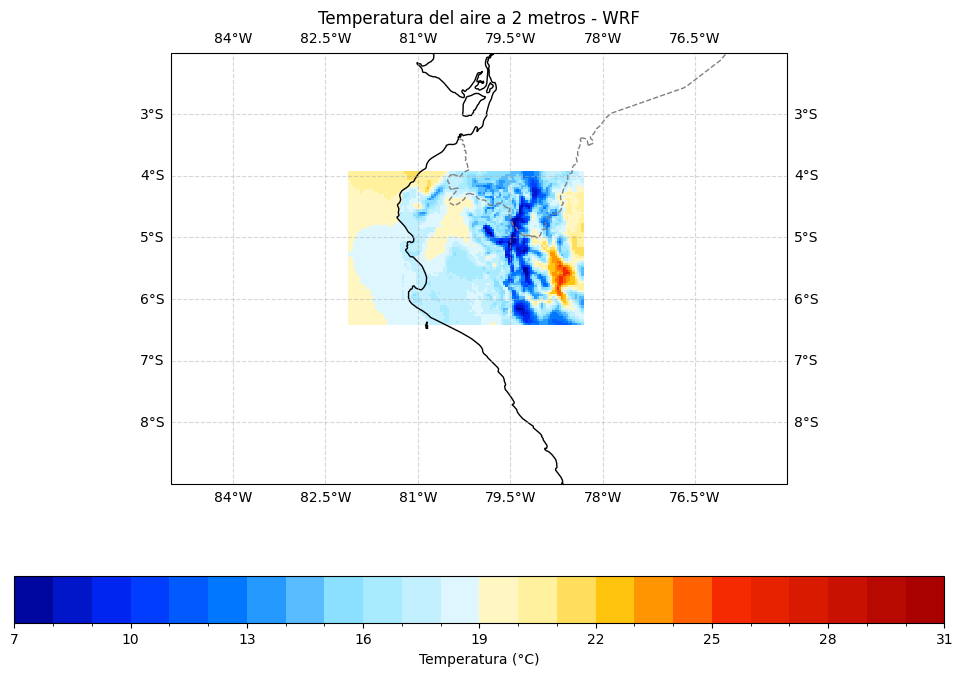

In [14]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Definir los colores personalizados para el colormap
colors = ['#00079F', '#0116C8', '#0125F0', '#013DFF', '#015AFE', '#0177FE', '#2699FE', '#58BCFE',
          '#8AE0FE', '#A8EAFE', '#C3F0FF', '#DEF7FF', '#FFF6C1', '#FFF19D', '#FFDE5D', '#FFC50E',
          '#FF9501', '#FF6101', '#F62A00', '#E72200', '#D71A00', '#C81101', '#B80901', '#A90100']

# Crear el colormap con los colores personalizados
cmap_custom = mcolors.ListedColormap(colors)

# Definir los límites para el rango de 7 a 31 grados Celsius
norm = mcolors.BoundaryNorm(boundaries=np.arange(7, 32, 1), ncolors=len(colors))

# Ruta del archivo WRF descargado
local_file = "./wrfout_d02_2024-11-24_06:00:00"

# Cargar el archivo WRF con xarray
ds = xr.open_dataset(local_file)

# Seleccionar la variable T2 (temperatura a 2 metros)
t2_data = ds["T2"].isel(Time=0) - 273.15  # Convertir a Celsius

# Crear el gráfico con Cartopy
fig, ax = plt.subplots(
    figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()}
)

# Graficar T2 con el colormap personalizado
mesh = ax.pcolormesh(
    ds["XLONG"].isel(Time=0),
    ds["XLAT"].isel(Time=0),
    t2_data,
    cmap=cmap_custom,
    norm=norm,
    transform=ccrs.PlateCarree(),  # Transformación a coordenadas geográficas
)
plt.colorbar(mesh, ax=ax, orientation="horizontal", label="Temperatura (°C)")

# Añadir bordes de continentes y líneas costeras
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle="--", edgecolor="gray")

# Restringir la extensión del mapa
lon_min, lon_max = -85, -75  # Límites de longitud
lat_min, lat_max = -9, -2  # Límites de latitud
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Añadir detalles al mapa
ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
ax.set_title("Temperatura del aire a 2 metros - WRF")
plt.show()
